# ASTR 596: FDS Homework 5: Hunting for Exoplanets (Due April 1 at Noon)


### The Kepler satellite has discovered many multi-planet systems. You can download artwork for some of them even at the [Exoplanet Travel Bureau](https://exoplanets.nasa.gov/alien-worlds/exoplanet-travel-bureau/)

<img src="Kepler-186f_small.jpg" width="500">


### But is there a system like our own Solar system with 8 planets (sorry Pluto)? In fact, there may be at least one - [Kepler 90](https://www.nytimes.com/2017/12/14/science/eight-planets-star-system.html). This along with most other Kepler planets, were not discovered through radial velocity measurements like our example in class (i.e. that nice parameteric model doesn't apply), but were rather discovered through transits - dips in the light of the star as the planet moves around it.


<img src="Transiting-Exoplanet-Light-Curve.gif">

### You get to find 3 exoplanets in the Kepler-90 system with the techniques in class. 


### To get and analyze the Kepler data, you'll need the `lightkurve` package

> `python -m pip install lightkurve --upgrade`

### I've included some code to get the light curve, clean it and remove the NaNs, and some outliers (you can judge the wisdom of strong outlier removal when you are hunting for planets), and bin the light curve a little bit in time.


<hr>

#### Hints:


* `lightkurve` has a bunch of useful [tutorials](https://docs.lightkurve.org/index.html), in particular [this one](https://docs.lightkurve.org/tutorials/3-science-examples/periodograms-creating-periodograms.html)

* once you get to a periodogram with `lightkurve`, `find_peaks` in `scipy` can help identify the exoplanet peaks

* You might find it easier to remove the signal of each planet as you find it and work with the residual light curve to find the next. This isn't strictly necessary if you do the previous steps well, but can be helpful. The tutorials page has a demo.

* [The Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/index.html) might be of help

<hr>

# Happy (planet) hunting!

In [1]:
import numpy as np
import astropy.table as at
import astropy.units as u
import matplotlib.pyplot as plt
import lightkurve as lk
from scipy.signal import find_peaks, find_peaks_cwt
import math

In [2]:
### RUN THIS
lcfs = lk.search_lightcurve('Kepler-90', mission='Kepler').download_all()

In [3]:
### RUN THIS
def squelch_rednoise(lc):
    corrected_lc = lc.remove_outliers(sigma_upper=10, sigma_lower=10).normalize().flatten(window_length=901)
    return corrected_lc

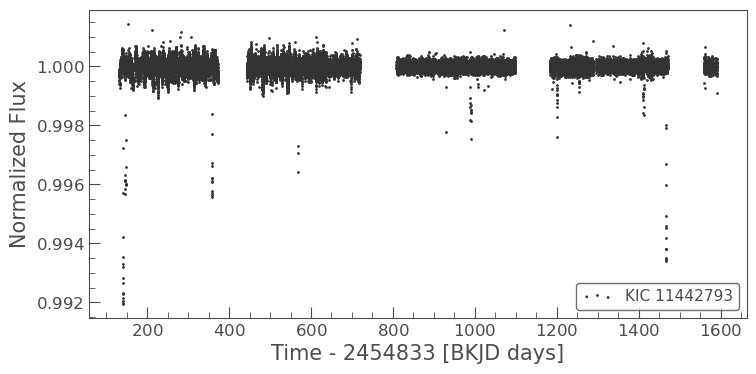

In [4]:
### RUN THIS - it will take a while.
stitched_lc = lcfs.stitch(corrector_func=squelch_rednoise)
clc = stitched_lc.remove_nans().bin(time_bin_size=60*u.min)
clc.scatter();
plt.show()

# This is the data we'll deal with

# Q1. First, calculate the periodogram using lightkurve. Use the `bls` method. Look for planets between 50 and 500 day periods with a grid spacing of 0.01d - this is coarse. Use `scipy.signal.find_peaks` to identify peaks in the periodogram. Remember to exclude any peaks arising from the Earth's revolution. Plot the periodogram and highlight the peak locations. (25 pts)


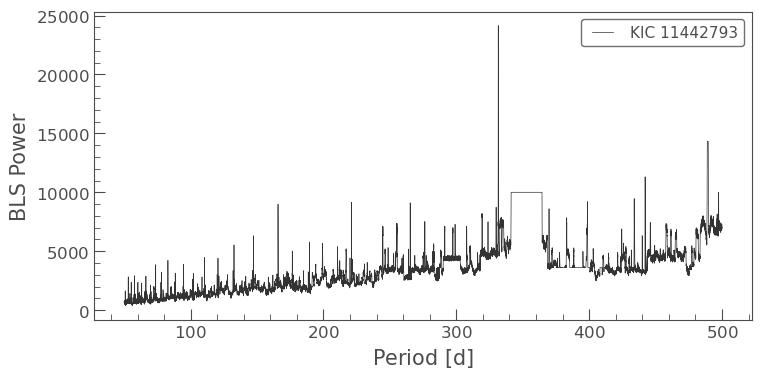

In [5]:
# YOUR CODE HERE
periodArray = np.arange(50., 500., 0.01)
pg = clc.to_periodogram(method="bls", period=periodArray)
pg.plot()
plt.show()

In [6]:
pg.show_properties()

lightkurve.Periodogram properties:
        Attribute                   Description            Units
------------------------- -------------------------------- -----
                 targetid                         11442793      
             default_view                           period      
                    label                     KIC 11442793      
                time_unit                              day      
       depth_at_max_power                           0.0068      
    duration_at_max_power                             0.33     d
   frequency_at_max_power                            0.003 1 / d
                max_power                       24149.8114      
      period_at_max_power                           331.58     d
                    depth                   array (45000,)      
                 duration                   array (45000,)     d
                     flux                   array (25596,)      
                frequency                   array (4500

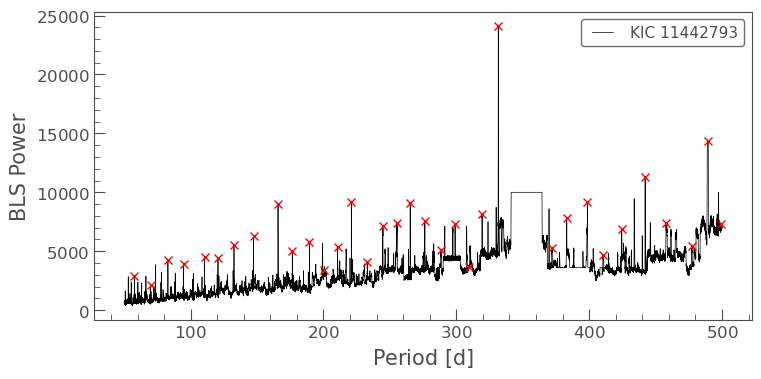

In [7]:
peaksMask = np.logical_or(pg.period.value < 340, pg.period.value > 370)
powerArray = np.array(pg.power[peaksMask])
periodArray = np.array(pg.period[peaksMask])

peaks, _ = find_peaks(powerArray, distance=1000)

pg.plot(color="black")
plt.plot(periodArray[peaks], powerArray[peaks], "x", color="red")
plt.show()

# Q2. a. The periodogram function from lightkurve can also get a transit time and peak power using `periodogram.transit_time` and `periodogram.power` - you'll want both. Get a sorted list of candidate periods, and print it sorted by peak power. (10 pts)

In [9]:
# YOUR CODE HERE
peakPower = powerArray[peaks]
candidatePeriods = periodArray[peaks]
sortedPowersIndices = np.argsort(peakPower)
sortedPowers, sortedPeriods = [], []
transitTimes = 0
for idx in sortedPowersIndices:
    print("Period: {:.5f} has a Power: {:.5f}".format(candidatePeriods[idx], peakPower[idx]))
    sortedPowers.append(float("{:.5f}".format(peakPower[idx])))
    sortedPeriods.append(float("{:.5f}".format(candidatePeriods[idx])))
    
sortedPowers, sortedPeriods = np.array(sortedPowers), np.array(sortedPeriods)

Period: 69.80000 has a Power: 2129.30890
Period: 57.67000 has a Power: 2919.24896
Period: 200.57000 has a Power: 3376.92753
Period: 309.18000 has a Power: 3666.99747
Period: 94.73000 has a Power: 3876.40840
Period: 232.91000 has a Power: 4047.47624
Period: 82.89000 has a Power: 4218.79685
Period: 120.58000 has a Power: 4402.80171
Period: 110.52000 has a Power: 4466.93871
Period: 410.59000 has a Power: 4677.21909
Period: 176.52000 has a Power: 5013.96617
Period: 288.29000 has a Power: 5111.19626
Period: 372.11000 has a Power: 5280.00160
Period: 210.61000 has a Power: 5385.16974
Period: 477.29000 has a Power: 5464.73532
Period: 132.63000 has a Power: 5531.71548
Period: 189.46000 has a Power: 5781.51914
Period: 147.36000 has a Power: 6304.83498
Period: 424.46000 has a Power: 6890.24352
Period: 244.59000 has a Power: 7107.11307
Period: 299.02000 has a Power: 7286.85320
Period: 499.46000 has a Power: 7322.37621
Period: 457.86000 has a Power: 7359.43102
Period: 255.21000 has a Power: 7361.80

# Q2. b. Next sort the list of periods from longest to shorted. Check if each period has a period in your list that is either 1/2 or 1/3 the same value. If it is, exclude it. If not keep it. Select the four periods with the highest power between 0 to 100d, 100d and 200d, 200d and 300d and 300d and 400d. (15 pts)

In [10]:
# YOUR CODE HERE
refinedPowers, refinedPeriods = [], []
for i in range(len(sortedPeriods)):
    bigPeriod = sortedPeriods[i]
    period = 0
    flag = False
    for j in range(len(sortedPeriods)):
        smallPeriod = sortedPeriods[j]
        if ((bigPeriod/smallPeriod > 1.99) and (bigPeriod/smallPeriod < 2.01)) or ((bigPeriod/smallPeriod > 2.99) and (bigPeriod/smallPeriod < 3.01)):
            flag = True
    if not flag:
        refinedPowers.append(sortedPowers[i])
        refinedPeriods.append(sortedPeriods[i])
refinedPowers, refinedPeriods = np.array(refinedPowers), np.array(refinedPeriods)

firstHundredDaysMask = (refinedPeriods < 100)
secondHundredDaysMask = (refinedPeriods > 100) & (refinedPeriods < 200)
thirdHundredDaysMask = (refinedPeriods > 200) & (refinedPeriods < 300)
fourthHundredDaysMask = (refinedPeriods > 300) & (refinedPeriods < 400)
print(refinedPeriods[firstHundredDaysMask])
print(refinedPeriods[secondHundredDaysMask])
print(refinedPeriods[thirdHundredDaysMask])
print(refinedPeriods[fourthHundredDaysMask])
maskList = [firstHundredDaysMask, secondHundredDaysMask, thirdHundredDaysMask, fourthHundredDaysMask]

finalPeriods, finalPowers = [], []
for mask in maskList:
    idx = np.argmax(refinedPowers[mask])
    finalPowers.append(refinedPowers[mask][idx])
    finalPeriods.append(refinedPeriods[mask][idx])
print(finalPeriods, finalPowers)

[69.8  57.67 94.73 82.89]
[120.58 110.52 176.52 132.63 147.36]
[200.57 232.91 288.29 210.61 244.59 299.02 255.21 276.29]
[309.18 372.11 383.05 319.33]
[82.89, 147.36, 276.29, 319.33] [4218.79685, 6304.83498, 7522.22028, 8198.50799]


# Q3. Select each peak period from the coarse grid in Q2.b. and then use lightkurve algorithm to refine the period within +/- 5 days, and get the best period. (25 pts)

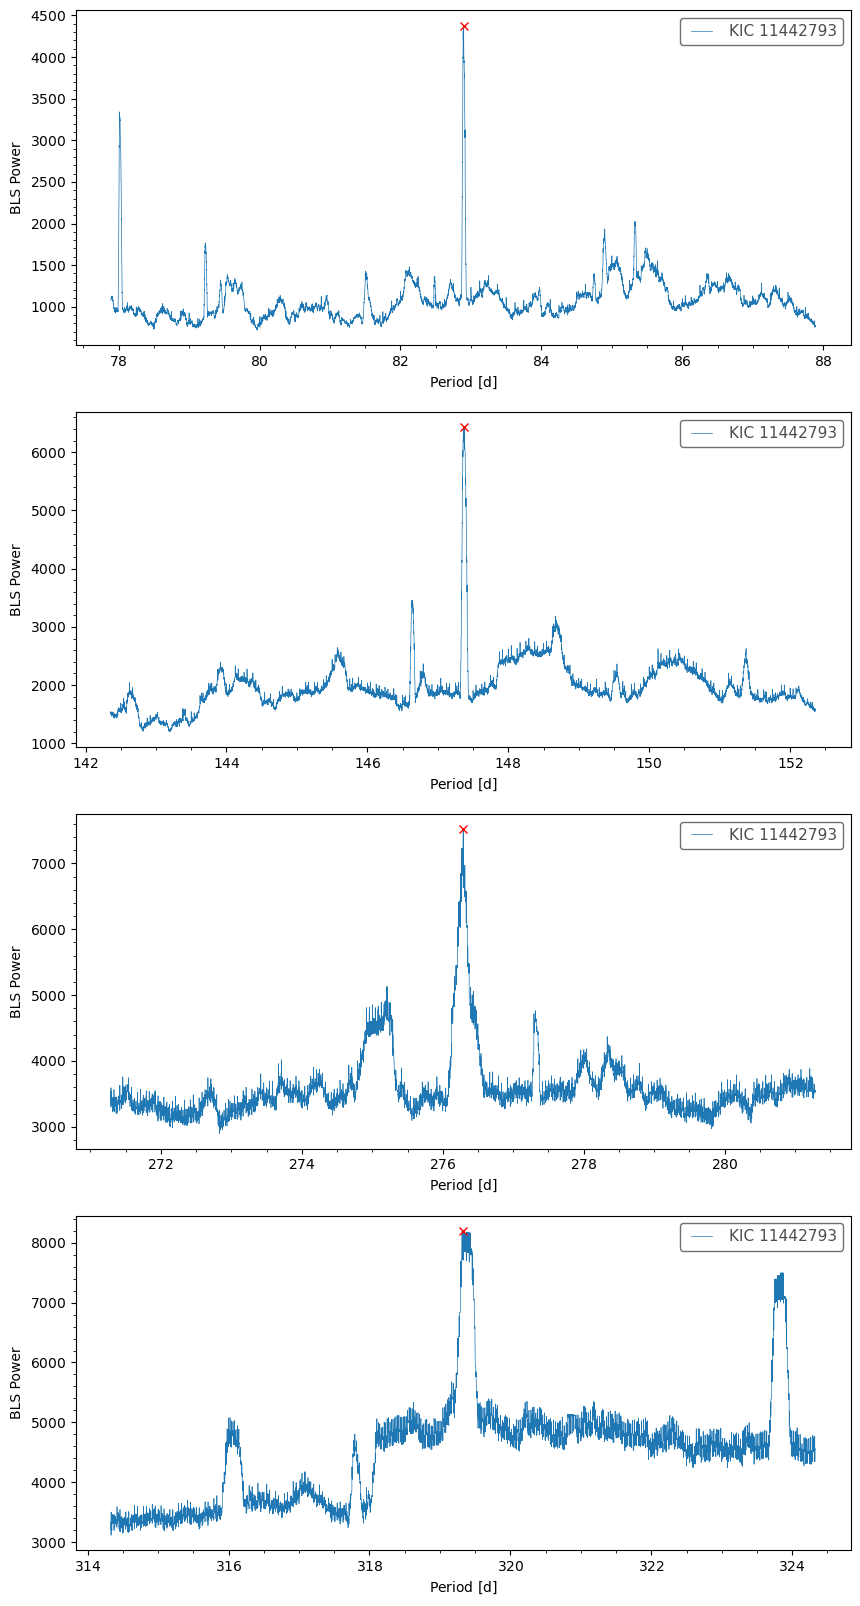

[<Quantity 82.896 d>, <Quantity 147.369 d>, <Quantity 276.29 d>, <Quantity 319.329 d>]


In [11]:
# YOUR CODE HERE
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10,20))

finalRefinedPeriods, finalTransitTime = [], []
for i in range(len(finalPeriods)):
    newPeriodArray = np.arange(finalPeriods[i]-5, finalPeriods[i]+5, 0.001)
    tempPg = clc.to_periodogram(method="bls", period=newPeriodArray)
    tempPg.plot(ax=ax[i])
    finalRefinedPeriods.append(tempPg.period_at_max_power)
    finalTransitTime.append(tempPg.transit_time_at_max_power)
    ax[i].plot(tempPg.period_at_max_power, tempPg.max_power, "x", color="red")
plt.show()
print(finalRefinedPeriods)

# Q4. Use lightkurve.fold to plot the folded light curve for each of the best periods in Q3. (25 pts)

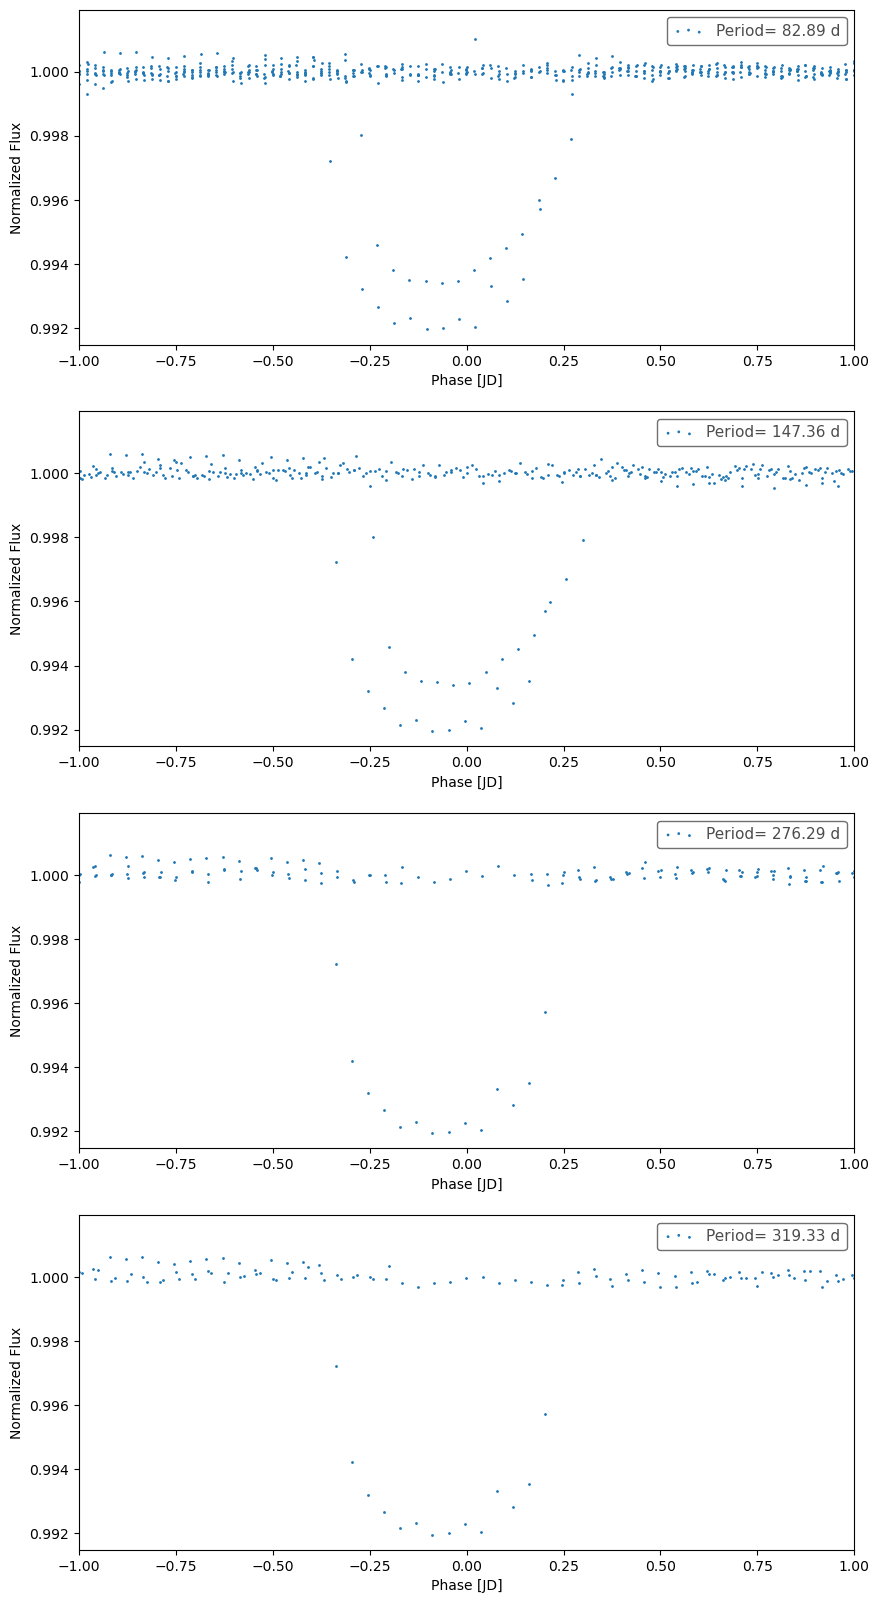

In [12]:
fig2, ax2 = plt.subplots(nrows=4, ncols=1, figsize=(10, 20))

for i in range(len(finalRefinedPeriods)):
    clc.fold(finalRefinedPeriods[i], epoch_time=finalTransitTime[i]).scatter(label="Period= {}".format(finalPeriods[i]*u.day), ax=ax2[i])
    ax2[i].set_xlim(-1,1)
    
plt.show()